In [ ]:
!python --version

Python 3.11.11


# Dependencies

In [ ]:
!pip install roboflow ultralytics supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [ ]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from roboflow import Roboflow
from ultralytics import YOLO
from IPython.display import Image as IPyImage

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Importing dataset

In [ ]:
HOME = os.getcwd()

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


In [ ]:
rf = Roboflow(api_key="mO7qlobiaGbOPlDoDT4s")
project = rf.workspace("dimash").project("spacevela-3d-cv-1-class-fail")
version = project.version(16)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to SpaceVela-3D/CV-1-class-fail-16 in yolov11:: 100%|██████████| 2606/2606 [00:00<00:00, 6514.64it/s]


# # Importing YOLO11-Seg model and Training

In [ ]:
%cd {HOME}

/content


In [ ]:
# !yolo task=segment mode=train model=yolo11m-seg.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

In [ ]:
# !yolo task=segment mode=train model=yolo11l-seg.pt data={dataset.location}/data.yaml epochs=120 imgsz=640 plots=True

100% 53.5M/53.5M [00:00<00:00, 96.4MB/s]
Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolo11l-seg.pt, data=/content/datasets/SpaceVela-3D/CV-1-class-fail-16/data.yaml, epochs=120, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False

In [ ]:
!yolo task=segment mode=train model=yolo11l-seg.pt data={dataset.location}/data.yaml epochs=300 imgsz=640 plots=True

# Evaluating the Model

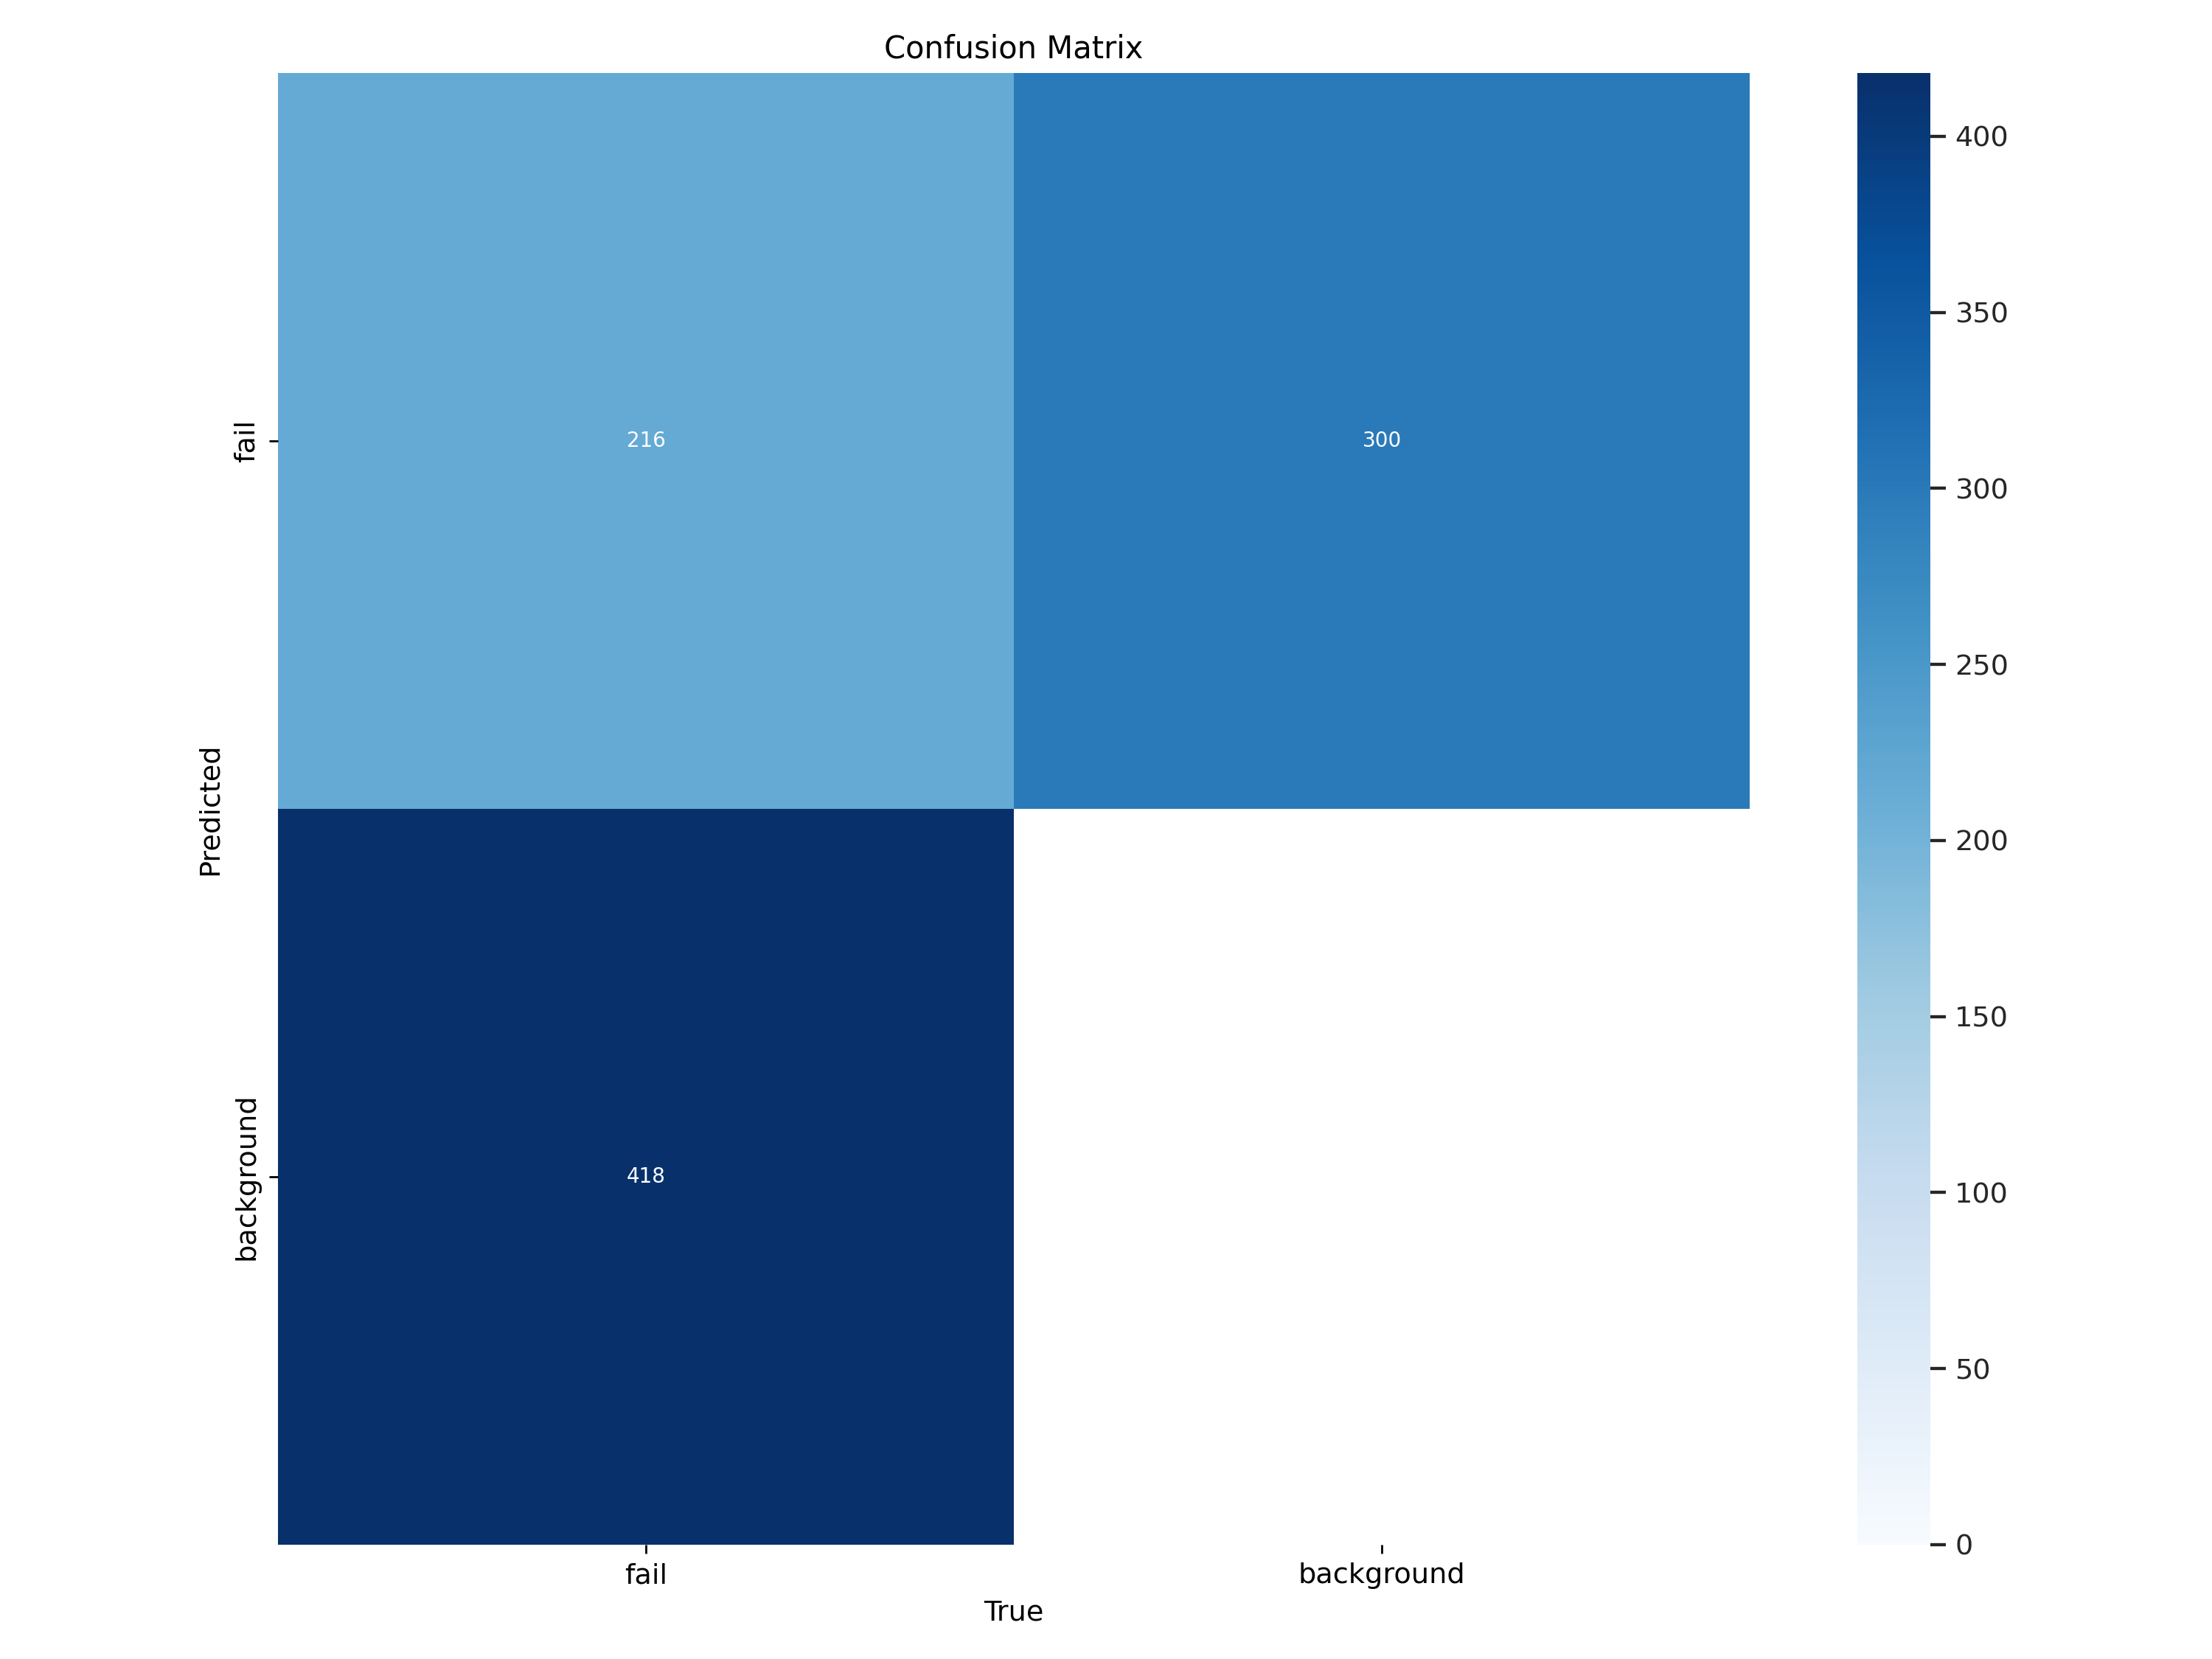

In [ ]:
# Confusion Matrix
IPyImage(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

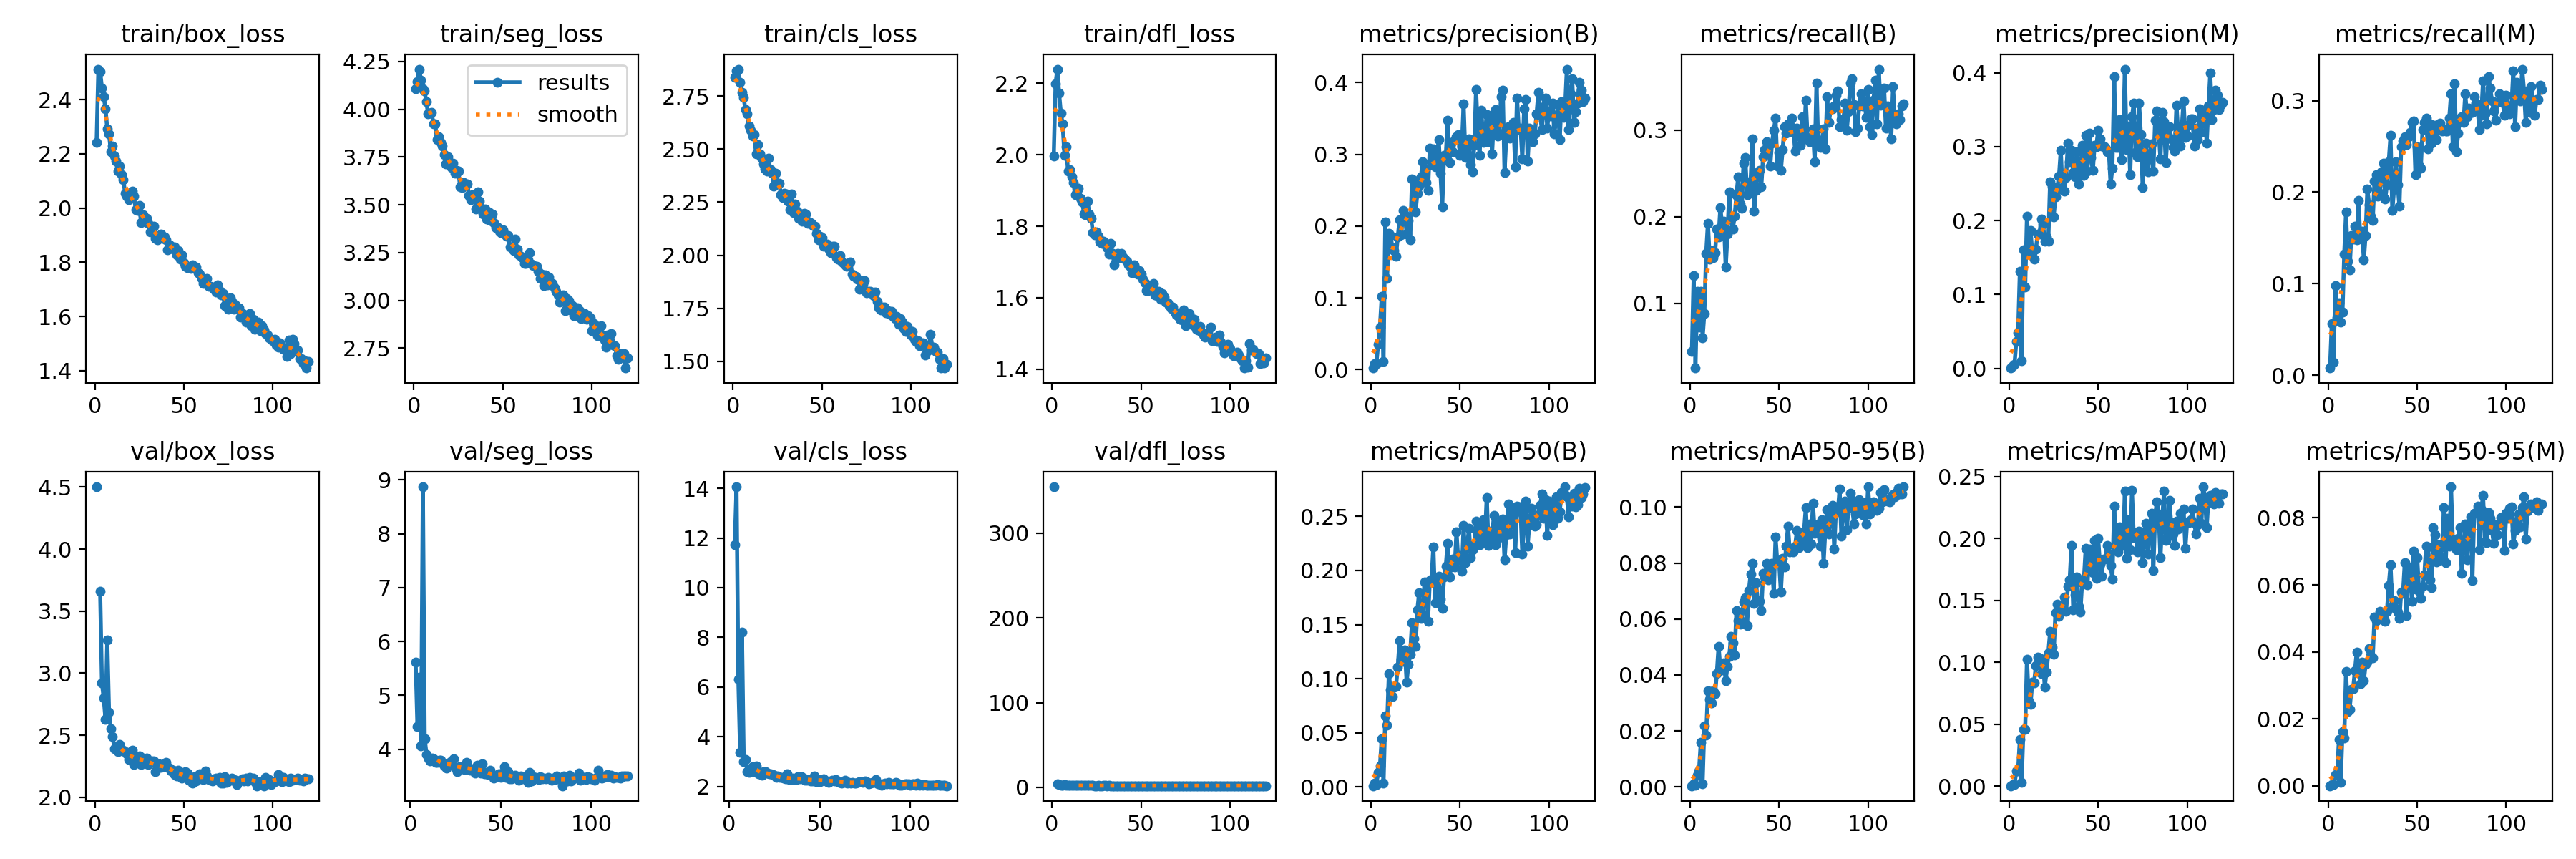

In [ ]:
# Graphs for loss, precision, recall and mAP50
IPyImage(filename=f'{HOME}/runs/segment/train/results.png', width=600)

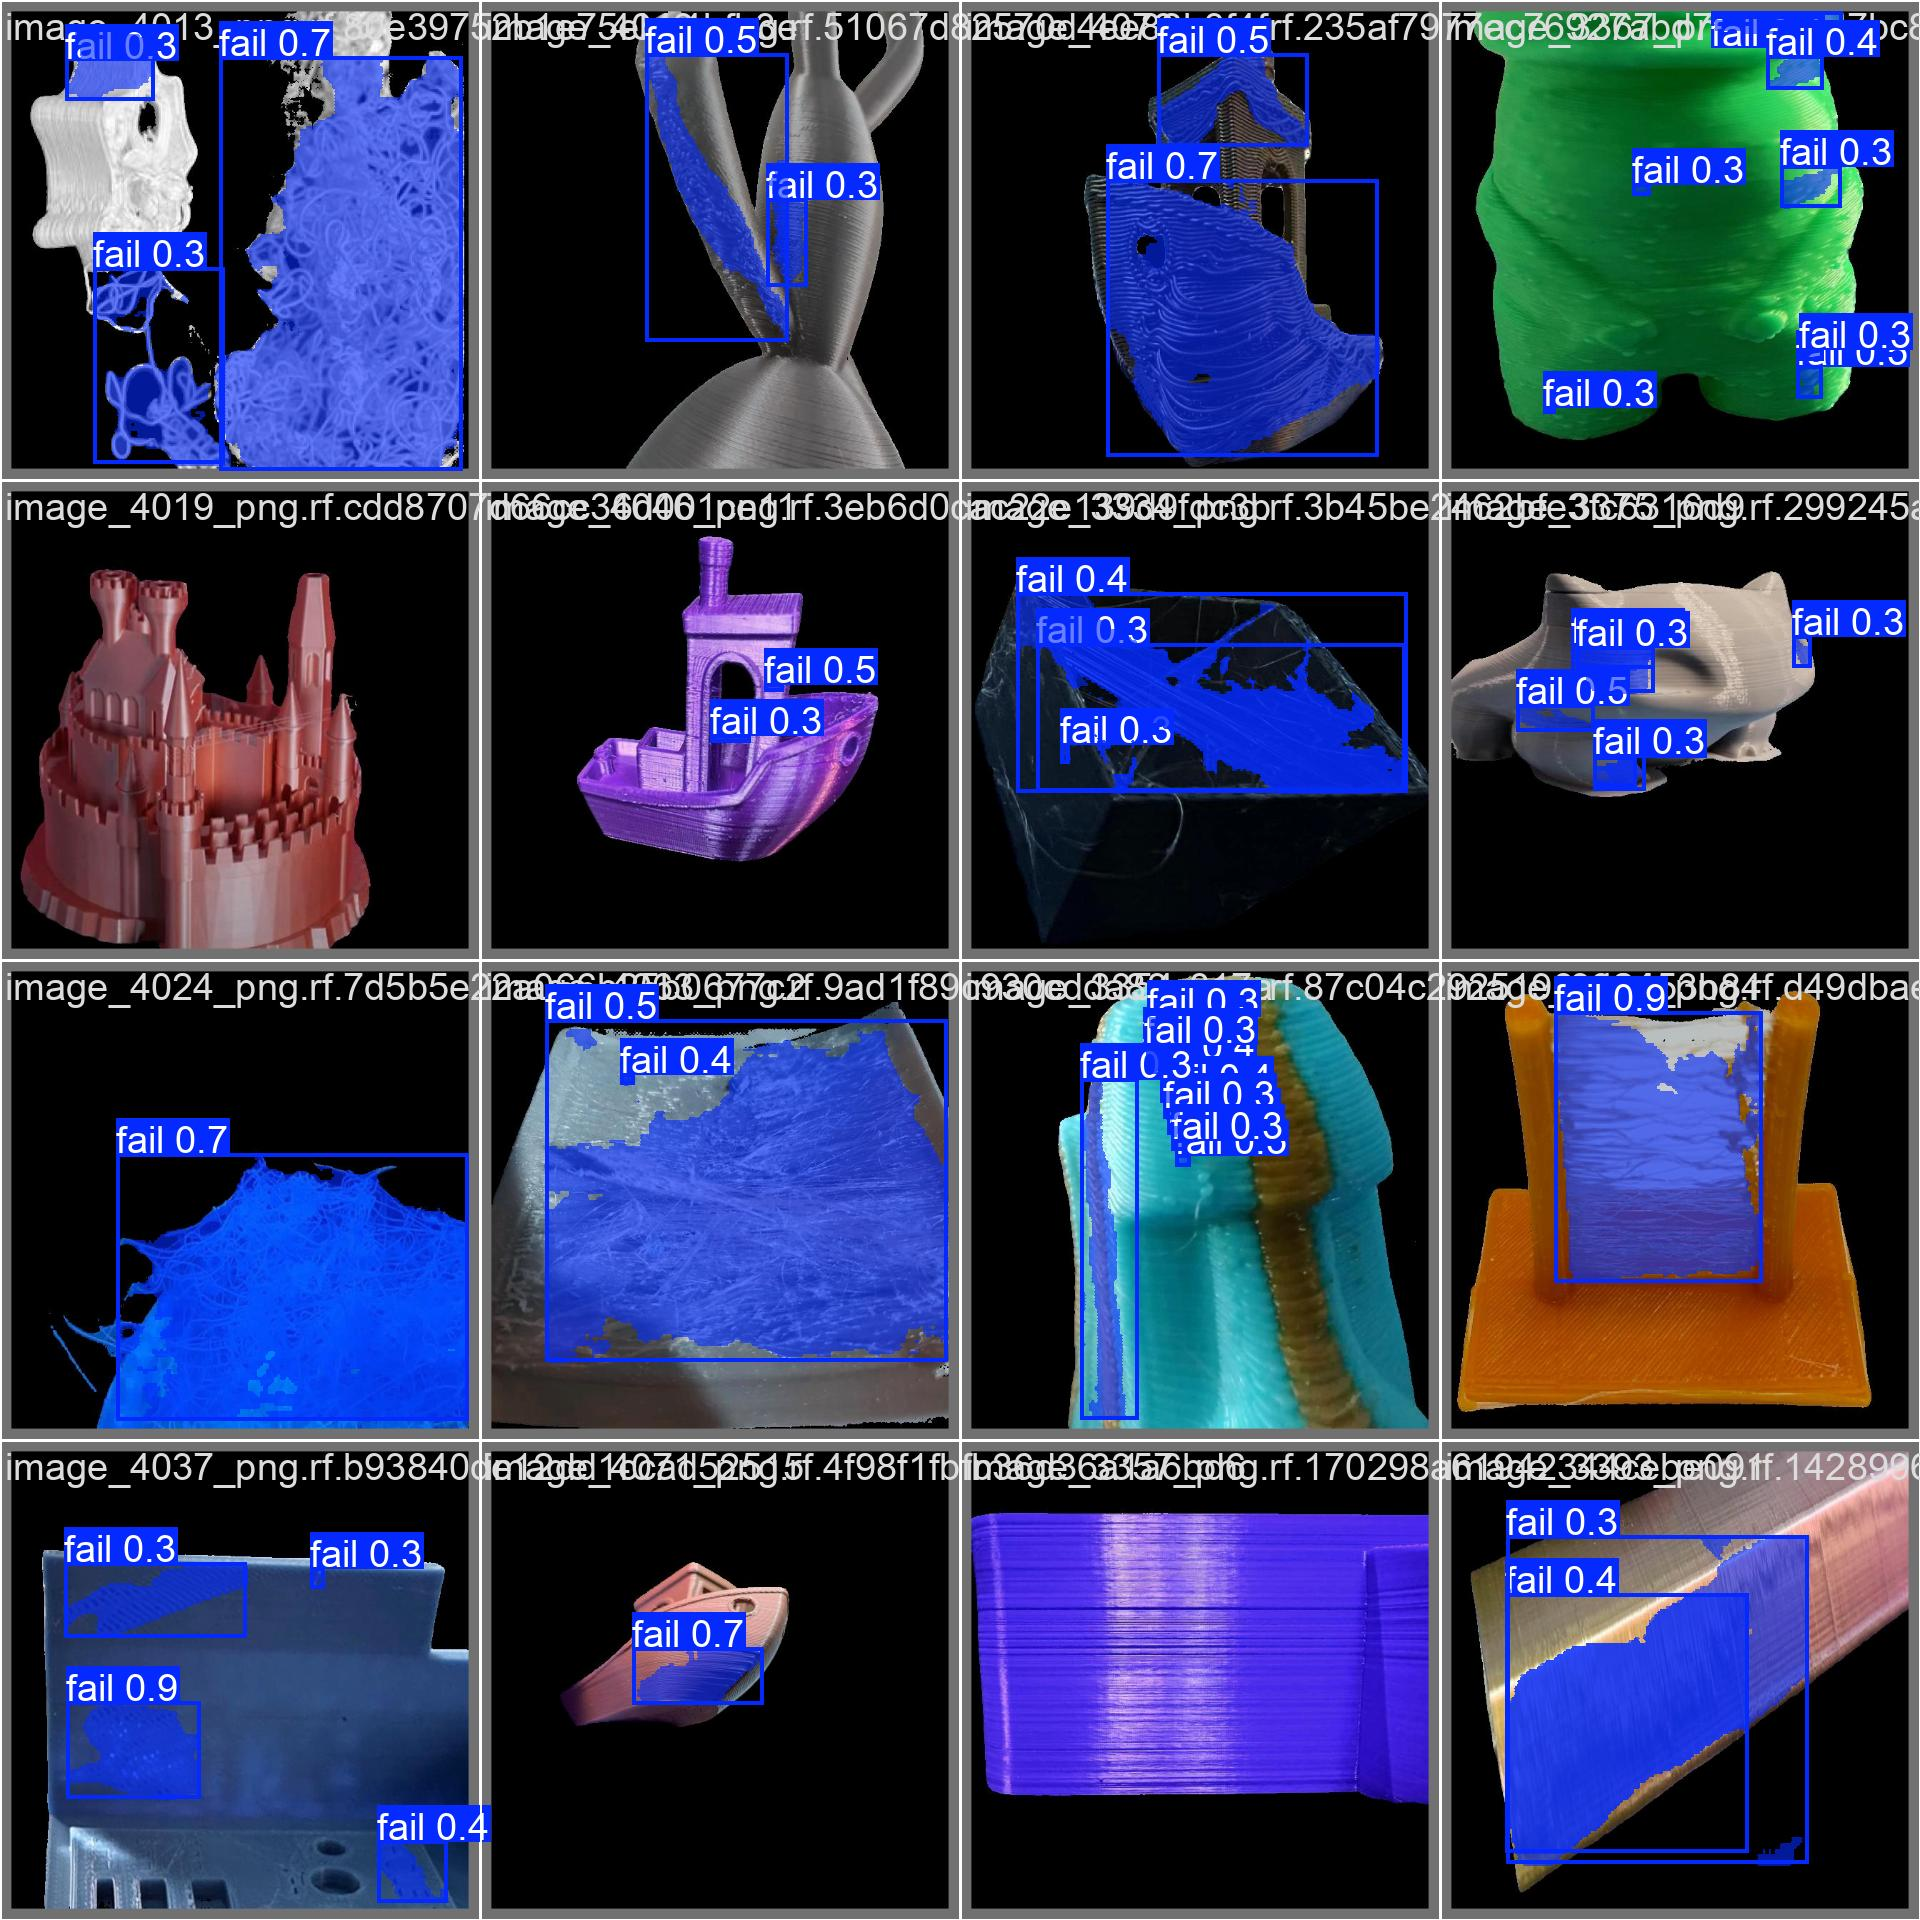

In [ ]:
# Few instances of segmentation
IPyImage(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=800)

# Exporting the Model

In [ ]:
project.version(dataset.version).deploy(model_type="yolov11", model_path=f"{HOME}/runs/detect/train/")

# References

In [ ]:
# How to use the model

'''
import cv2
import supervision as sv
from inference import get_model

model_id = project.id.split("/")[1] + "/" + dataset.version
model = get_model(model_id, "<ROBOFLOW_API_KEY>")

image = cv2.imread("<PATH_TO_IMAGE>")
result = model.infer(image)
detections = sv.Detections.from_inference(result)
'''

1. https://docs.ultralytics.com/tasks/segment
2. https://blog.roboflow.com/train-yolov11-instance-segmentation